In [2]:
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from kaggle_environments import make
from kaggle_environments.envs.kore_fleets.helpers import *
from kaggle_environments.envs.kore_fleets.kore_fleets import *
import numpy as np
import skimage
import itertools
from copy import deepcopy
import pickle

In [93]:
get_shortest_flight_path_between(Point(5, 5), Point(11, 13), 21, trailing_digits=True)

'E5N7'

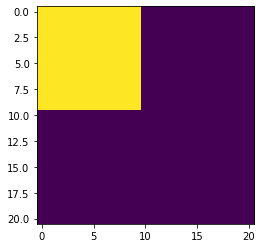

In [4]:
b = np.zeros((21, 21))
mask = np.zeros_like(b)
cx, cy = 5, 5
s = 11
mask[cx-s//2:cx + s//2, cy - s//2:cy + s//2] = 1
plt.imshow(mask)

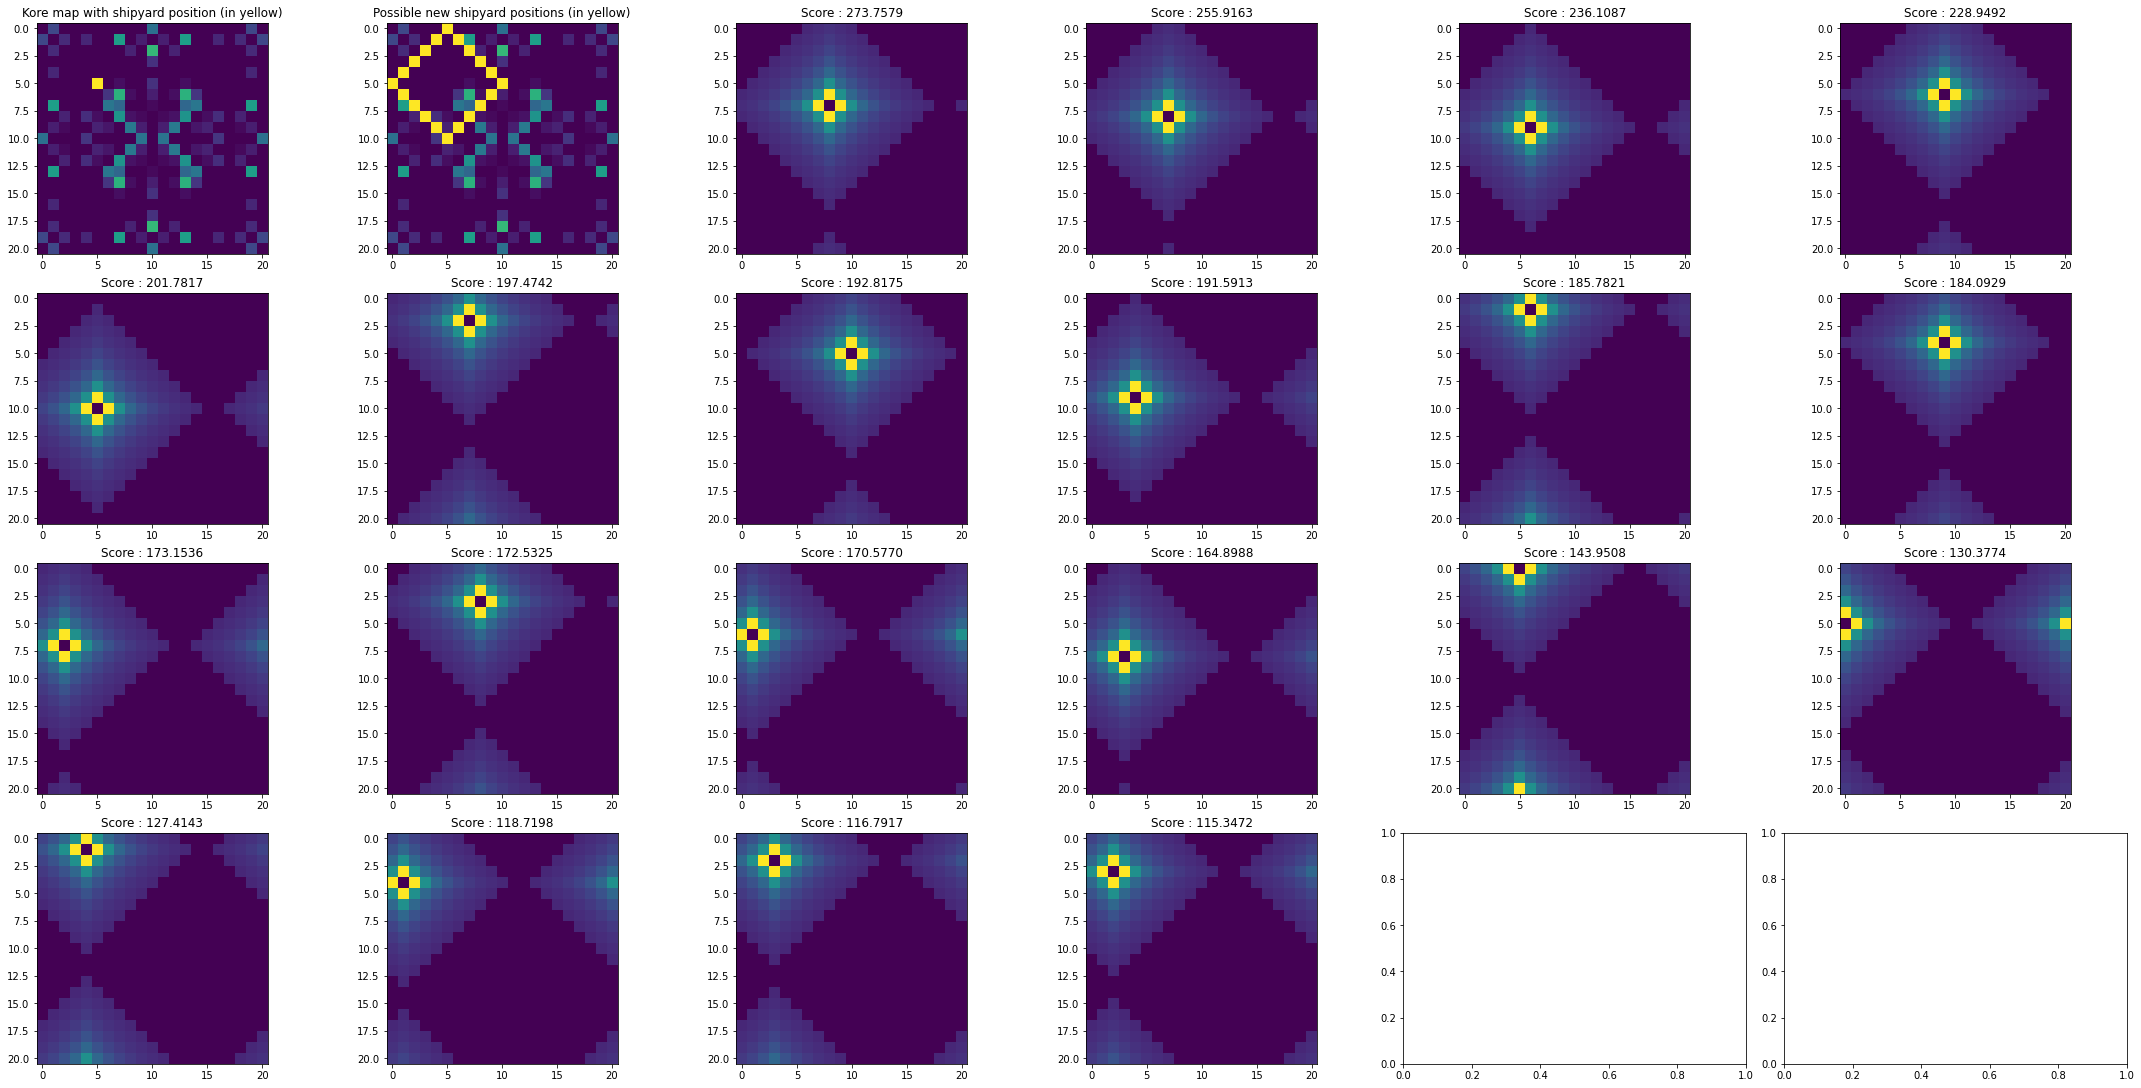

In [89]:
env = make("kore_fleets", debug=True)
board = np.array(env.state[0]['observation']['kore']).reshape((21,21))
# board = np.random.random((21, 21))
bcx, bcy = board.shape[0] // 2, board.shape[1] // 2

x = np.arange(0, 21)
y = np.arange(0, 21)
arr = np.zeros((y.size, x.size))

# Shipyard center
cx = 5
cy = 5
ox = bcx - cx
oy = bcy - cy

# All positions will be checked => At a strict distance of 5 of the shipyard
circle_pos = abs(x[np.newaxis,:]-bcx) + abs(y[:,np.newaxis]-bcy) == 5
circle_pos = np.roll(circle_pos, -ox, axis=0)
circle_pos = np.roll(circle_pos, -oy, axis=1)

board_pos = board.copy()
board_pos[circle_pos] = np.max(board) * 1.5

scores = list()
pos = np.where(circle_pos)
for px, py in zip(pos[0], pos[1]):
    kore_weights = np.zeros(board.shape)

    ox = bcx - px
    oy = bcy - py

    for r in range(1, 10):
        mask = abs(x[np.newaxis,:]-bcx) + abs(y[:,np.newaxis]-bcy) == r
        kore_weights[mask] = 1 / r

    kore_weights = np.roll(kore_weights, -ox, axis=0)
    kore_weights = np.roll(kore_weights, -oy, axis=1)

    scores += [[kore_weights, np.sum(kore_weights * board)]]

scores = sorted(scores, key=lambda x: x[1])[::-1]

fig, axs = plt.subplots(int(np.ceil((len(scores) + 2) / 6)), 6, figsize=(30, 15), constrained_layout=True)
board[cx, cy] = np.max(board) * 1.5
axs[0, 0].imshow(board)
axs[0, 0].set_title("Kore map with shipyard position (in yellow)")
axs[0, 1].imshow(board_pos)
axs[0, 1].set_title("Possible new shipyard positions (in yellow)")

for n, score in enumerate(scores):
    i, j = divmod(n + 2, 6)
    axs[i, j].imshow(score[0])
    axs[i, j].set_title(f"Score : {score[1]:.4f}")

In [71]:

    print(x, y)

3 3
4 2
4 4
5 1
5 5
6 0
6 6
7 7
7 20
8 8
8 19
9 7
9 20
10 0
10 6
11 1
11 5
12 2
12 4
13 3


In [58]:
circle_pos = abs(x[np.newaxis,:]-bcx) + abs(y[:,np.newaxis]-bcy) == 5

In [59]:
circle_pos

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False

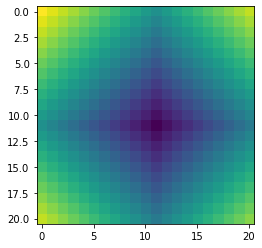

In [19]:
plt.imshow(abs(x[np.newaxis,:]-cx)+ abs(y[:,np.newaxis]-cy))

In [14]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])